In [1]:
#Dependencies
import numpy as np
import pandas as pd
import scipy.stats as sm
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objs as go
import seaborn as sns
import pylab as py
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
# improving the defaults sizes and fontsizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [3]:
superstore_df=pd.read_csv('D:\Data Science projects\Data Files\CSV files\Superstore.csv',error_bad_lines=False, encoding='cp1252')

In [4]:
superstore_df.shape

(9994, 21)

In [5]:
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
superstore_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [38]:
superstore_df.nunique()

Row ID              1
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [5]:
superstore_df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [6]:
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'])

In [8]:
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])

In [11]:
superstore_df['Month'] = superstore_df['Ship Date'].dt.month
superstore_df['Year'] = superstore_df['Ship Date'].dt.year

In [12]:
#Duration of Delay days Shipping
superstore_df['Delay ship days'] = superstore_df['Ship Date']  - superstore_df['Order Date']

In [14]:
delay = superstore_df['Delay ship days'].value_counts().reset_index()

In [15]:
delay = pd.DataFrame(delay)
delay.columns=['days','Delay ship Days']

In [16]:
delay

,days,Delay ship Days
0,4 days,2774
1,5 days,2169
2,2 days,1334
3,6 days,1203
4,3 days,1005
5,7 days,621
6,0 days,519
7,1 days,369


In [17]:
latedays = superstore_df[superstore_df['Delay ship days'] == '7 days']

In [18]:
latedays['Year'].value_counts()

2017    210
2016    155
2015    142
2014    104
2018     10
Name: Year, dtype: int64

In [19]:
#Each month late days
latedays['Month'].value_counts()

12    85
8     77
11    75
9     66
10    50
4     46
1     44
6     44
7     40
2     39
5     33
3     22
Name: Month, dtype: int64

In [20]:
#Yearly sales
yearlysales = superstore_df.groupby(['Year'])['Sales'].sum().reset_index()

In [21]:
#Monthly Sales
monthsales = superstore_df.groupby(['Month'])['Sales'].sum().reset_index()

In [22]:
#Yearly quantity
yearlyquantity = superstore_df.groupby(['Year'])['Quantity'].sum().reset_index()

In [23]:
#Each state shipping delay
latedays['State'].value_counts()

California        127
New York           67
Washington         59
Texas              47
Arizona            31
Florida            30
Illinois           28
Pennsylvania       25
Ohio               22
Tennessee          16
North Carolina     16
Michigan           16
New Jersey         13
Minnesota          12
Georgia            11
Kentucky            9
Indiana             9
Massachusetts       8
Arkansas            8
Colorado            7
Nevada              7
Rhode Island        6
Oklahoma            6
Virginia            6
Alabama             6
Kansas              4
Oregon              3
Maryland            3
Delaware            3
Montana             3
Connecticut         3
Iowa                2
Mississippi         2
Wisconsin           2
Nebraska            1
New Mexico          1
New Hampshire       1
Missouri            1
Name: State, dtype: int64

In [25]:
#Discount and Sales Statistics
discountstats= superstore_df.groupby(['Category'])['Discount'].sum().reset_index()
salesstats = superstore_df.groupby(['Category'])['Sales'].sum().reset_index()

In [26]:
yearly_discounts = superstore_df.groupby(['Year'])['Discount'].sum().reset_index()

In [27]:
yearly_sales = superstore_df.groupby(['Year'])['Sales'].sum().reset_index()

In [ ]:
yeardiscoutsales = pd.merge(yearly_discounts,yearly_sales,on = ['Year'])

In [10]:
#Distribution of Sales
fig=px.histogram(superstore_df,x='Sales',marginal='box',nbins=47,title='Distribution of Sales')
fig.update_layout(bargap=0.1)
fig.show() 

In [14]:
trace=go.Histogram(x=superstore_df.Sales, xbins=dict(start=np.min(superstore_df.Sales),size=100,end=np.max(superstore_df.Sales)),marker=dict(color='rgb(0,0,100)'))
layout=go.Layout(
    title='Distribution of Sales'
)
fig=go.Figure(data=go.Data([trace]),layout=layout)
fig.show()

In [21]:
# Distribution of Discounts
trace=go.Histogram(x=superstore_df.Discount, xbins=dict(start=np.min(superstore_df.Discount),size=0.05,end=np.max(superstore_df.Discount)),marker=dict(color='rgb(100,0,100)'))

layout=go.Layout(
    title='Distribution of Discounts'
    )

fig=go.Figure(data=go.Data([trace]),layout=layout)
fig.show()

In [23]:
#Distribution of Profits
trace=go.Histogram(x=superstore_df.Profit, xbins=dict(start=np.min(superstore_df.Profit),size=100,end=np.max(superstore_df.Profit)),marker=dict(color='rgb(100,0,90)'))

layout=go.Layout(
    title='Distribution of Profits'    
)

fig=go.Figure(data=go.Data([trace]),layout=layout)
fig.show()


Is profit distribution normal?


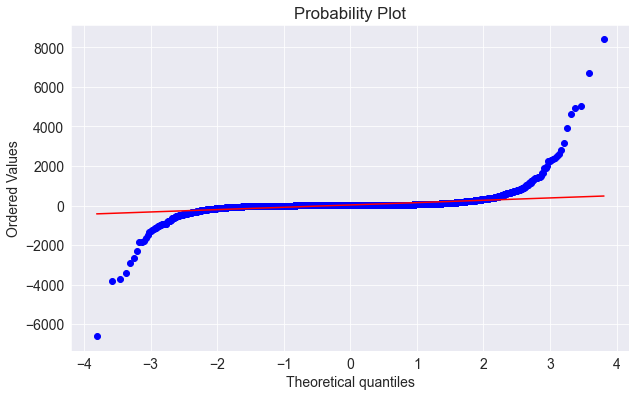

In [25]:
print("Is profit distribution normal?")
sm.probplot(superstore_df.Profit, dist="norm", plot=py)
py.show()

In [27]:
#Distribution of Quantity
trace=go.Histogram(x=superstore_df.Quantity,xbins=dict(start=np.min(superstore_df.Quantity),size=1,end=np.max(superstore_df.Quantity)),marker=dict(color='rgb(110,0,50)'))

layout=go.Layout(
    title='Distribution of Quantities'
)

fig=go.Figure(data=go.Data([trace]),layout=layout)
fig.show()


In [ ]:
#What are the most common categories and sub categories??

#In order to make creating sunburns easier, I will replace row indexes with ones. 

In [6]:
def ones(x):
    return 1
superstore_df['Row ID']=superstore_df['Row ID'].apply(ones)
    

In [7]:
fig=px.sunburst(data_frame=superstore_df[['Category','Sub-Category','Row ID']].groupby(['Category','Sub-Category']).sum().reset_index(),path=['Category', 'Sub-Category'], values='Row ID', title='Frequency of category occurences.',color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

I used Row ID as a value for the sunburst, The sum of row_ids for every category gives us the frequency of occurence of every category

In [ ]:
#The only unique value of country column in is United states, so Instead of plotting the frequency of the occurence of the countries, I'll plot the frequency of the occurence of the regions and cities


In [8]:
fig=px.sunburst(data_frame=superstore_df[['Region','State','City','Row ID']].groupby(['Region','State','City']).sum().reset_index(),path=['Region','State','City'],values='Row ID',color_discrete_sequence=px.colors.qualitative.Dark2,title='Frequency of occurence of Region and States')
fig.show()

In [5]:
#Top products by frequency

print('Total Count of Products :',len(list(superstore_df['Product Name'].unique())))

top_prod=superstore_df.groupby('Product Name').size().reset_index().rename(columns={0:'total'}).sort_values('total',ascending=False).head(5)
fig=px.pie(top_prod,values='total',names='Product Name',color_discrete_sequence=px.colors.sequential.Hot, title='Top 5 products.')
fig.show()

top_prod=superstore_df.groupby('Product Name').size().reset_index().rename(columns={0:'total'}).sort_values('total',ascending=False).head(10)
fig=px.pie(top_prod,values='total',names='Product Name',color_discrete_sequence=px.colors.sequential.Hot, title='Top 10 products.')
fig.show()

top_prod =superstore_df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(20)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 20 products.')
fig.show()

Total Count of Products : 1850


I plot top products by subcategory, the chart will be a complete mess, so I'll plot top products by category instead

In [9]:
#Top products by category
fig = px.sunburst(data_frame = superstore_df[['Category','Product Name','Row ID']].groupby(['Category','Product Name']).sum().reset_index().sort_values('Row ID',ascending=False).head(50), path=['Category', 'Product Name'], values='Row ID', title='Top 50 products and their distribution across categories',color_discrete_sequence=px.colors.sequential.Agsunset)
fig.show()

In [10]:
#Frequency of Occurence by order status
order_status = superstore_df.groupby('Order ID').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head()
fig = px.pie(order_status, values='Total', names='Order ID', color_discrete_sequence=px.colors.sequential.Plasma, title='Order Status')
fig.show()

In [11]:
#Which segment is more common?
segment = superstore_df.groupby('Segment').size().reset_index().rename(columns={0:'Total'})
fig=px.pie(segment,names='Segment',values='Total',color_discrete_sequence=px.colors.sequential.Cividis, title='Segments frequency')
fig.show()

In [17]:
#Sales and profits of different categories
trace=go.Histogram(x=superstore_df[superstore_df.Category=='Technology'].Profit,xbins=dict(start=np.min(superstore_df.Profit),size=100,end=np.max(superstore_df.Profit)),
                   marker=dict(color='rgb(100, 0, 90)'),name='Technology')


trace2  = go.Histogram(x=superstore_df[superstore_df.Category=='Furniture'].Profit, xbins=dict(start=np.min(superstore_df.Profit), size=100, end=np.max(superstore_df.Profit)),
                   marker=dict(color='rgb(225, 0, 0)'),name='Furniture')

trace3 = go.Histogram(x=superstore_df[superstore_df.Category=='Office Supplies'].Profit, xbins=dict(start=np.min(superstore_df.Profit), size=100, end=np.max(superstore_df.Profit)),
                   marker=dict(color='rgb(255, 255, 0)'),name='Office Supplies')


layout = go.Layout(
    title="Profit by category"
)
fig = go.Figure(data=go.Data([trace,trace2,trace3]), layout=layout)
fig.show()


C:\Users\user\anaconda3\New folder\New folder\ANACONDA\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [18]:

print('Technology products mean profit',superstore_df[superstore_df.Category=='Technology'].Profit.mean(),'Technology products profit std', superstore_df[superstore_df.Category=='Technology'].Profit.std(),'Technology products profit median', superstore_df[superstore_df.Category=='Technology'].Profit.median())
print('Furniture products mean profit',superstore_df[superstore_df.Category=='Furniture'].Profit.mean(),'Furniture products profit std', superstore_df[superstore_df.Category=='Furniture'].Profit.std(),'Furniture products profit median', superstore_df[superstore_df.Category=='Furniture'].Profit.median())
print('Office Supplies products mean profit',superstore_df[superstore_df.Category=='Office Supplies'].Profit.mean(),'Office Supplies products profit std', superstore_df[(superstore_df.Category=='Office supplies')].dropna().Profit.std(),'Office Supplies products profit median', superstore_df[(superstore_df.Category=='Office supplies')].dropna().Profit.median())

Technology products mean profit 78.75200221981586 Technology products profit std 428.81663300517454 Technology products profit median 25.0182
Furniture products mean profit 8.699327109853842 Furniture products profit std 136.04924643905227 Furniture products profit median 7.7748
Office Supplies products mean profit 20.327049585131117 Office Supplies products profit std nan Office Supplies products profit median nan


1) The distribution of sales is very right-skewed: the majority of sales are below the mean value, but there is a long right tale of high sales.

2) The discounts distribution is right-skewed and not continuous.

3) Profit distribution is bell-shaped, but not normal because of its enormously large tales and a lot of outliers (especially on the right side of the distribution)

4) The distribution of quantity is right-skewed, but not as much as the distribution of sales.

5) The most common category is office supplies and the least common one is technology

6) Binders, Paper, Storage, Art and Phones are the most common sub-categories.

7) The West region has most customers and the South region has least custommers.

8)New York, Los Angeles, San Francisco, Philadelphia, Seatle and Houston are the biggest city in terms of the amount of customers.

9) Staple envelope, Staples, Easy-staple paper, Avery Non-Stick Binders, Staples in misc.colors are the most popular products. (Everyone needs to staple the paper!)

10) Top tech products are Maxell 4.7 GB DVD-R, LogiTech Dekstop MK120 Mouse and keyboard Combo, Kingston Digital DataTraveler, Logitech 910-002974 M325 Wireless Mouse for Web Scrolling

Top office products are staple-related products

Top furniture products are KL Adjustable-Height Table, Staple-based wall hangings, Situation Contoured Folding Chairs

11) Consumer segment is the most common segment.

12) Tech products have the highest mean and median of profit distribution, but they also have the highest variability.

13) Tech products have the highest mean of the sales, but not the highest median. That's because of the outliers.